## Modules

In [4]:
import os
from tqdm import tqdm

import numpy as np
from scipy.signal import find_peaks, correlate
from scipy.ndimage import gaussian_filter, median_filter
from scipy.stats import sem
from signal_analysis import SignalAnalysis

import seaborn as sns
import seaborn_image as isns
import cmcrameri.cm as cmc
from matplotlib import pyplot as plt


cmap = 'cmc.batlow'
sns.set_palette(cmap)

## Open data

In [14]:
pathBase = r"C:\Users\gabri\Desktop\testAnalyse\2024_07-18"

data = np.loadtxt(pathBase + "\\785std.csv", skiprows=1, delimiter=',')
vein1 = data[:, 1]
vein2 = data[:, 2]
still1 = data[:, 3]
still2 = data[:, 4]

ts = np.load(pathBase + "\\785ts.npy")

### AP timeseries

In [15]:
FPS = 50
AP_idx = []
nChannels=5
AP_begin = 5
percycle=15
FPSc = FPS/nChannels
framespcycles = int(FPSc*percycle)
ncycles = int(len(ts)//framespcycles)
AP_times = np.array(list(range(ncycles)))*15+5

for ti in AP_times:
    AP_idx.append(np.argmin(np.absolute(ts-ti)))

# Dirac où AP dans times series
AP_series = np.zeros(len(ts))
AP_series[AP_idx] = 1

## Plot

(0.0, 100.0)

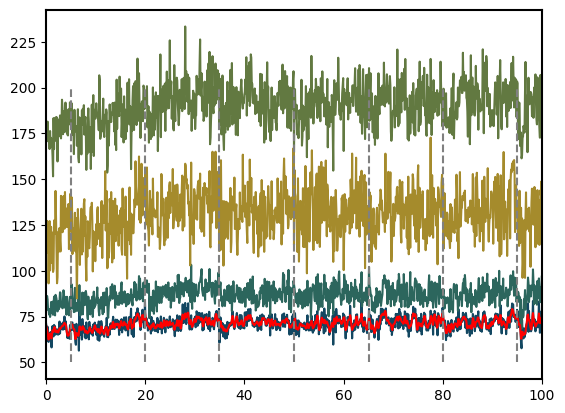

In [23]:
plt.plot(ts, vein1)
plt.plot(ts, vein2)
plt.plot(ts, still1-50)
plt.plot(ts, still2-100)
plt.plot(ts, gaussian_filter(vein1, sigma=1), color='red')
plt.vlines(ts[AP_idx], 50, 200, color='grey', linestyles='--')
plt.xlim(0, 100)